In [ ]:
import pandas as pd
import numpy as np
 
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
 

In [ ]:
df = pd.read_csv('./dataset/label지정.csv', encoding='CP949')

In [ ]:
df.columns

In [ ]:
df.columns = ['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', 'Sales_growth',
       'Property_growth', 'NC_asset_growth', 'Total_capital_growth', 'Owned_capital_growth',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)', 'year', 'month', 'label']

In [ ]:
## Kolmogorov-Smirnov test
## 선형 모형 적합
fit = ols('Property_growth ~ label',data=df).fit()
 
## 이론상 잔차값 계산
sqrt_mse = np.sqrt(fit.mse_resid) ## square root of mse
std_res = fit.resid/sqrt_mse ## studentized residual
 
def empirical_dist(x,samples):
    ## x에 대응하는 경험 분포 값을 계산하는 함수
    count = 0
    for s in samples:
        if s <= x:
            count += 1
    return count/len(samples)
 
distance = [] ## 경험 분포 함수값과 정규분포의 누적함수 값의 차이를 담는다.
for r in std_res:
    diff = abs(empirical_dist(r,std_res)-norm.cdf(r))
    distance.append(diff)
 
## K-S 검정 통계량
ks_stat = max(distance)

In [ ]:
ks_stat

In [ ]:
df = df[['Sales_growth',
       'Property_growth', 'NC_asset_growth', 'Total_capital_growth', 'Owned_capital_growth',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)']]

In [ ]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(df['[제조]유동자산증가율'], 'norm')

In [ ]:
from scipy import stats

stats.kstest(df['NC_asset_growth'],'norm')

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize


In [42]:
for col in df.columns:
    df[col] = winsorize(df[col], limits= 0.01)

<ipython-input-42-7fdd39f1f3ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = winsorize(df[col], limits= 0.01)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

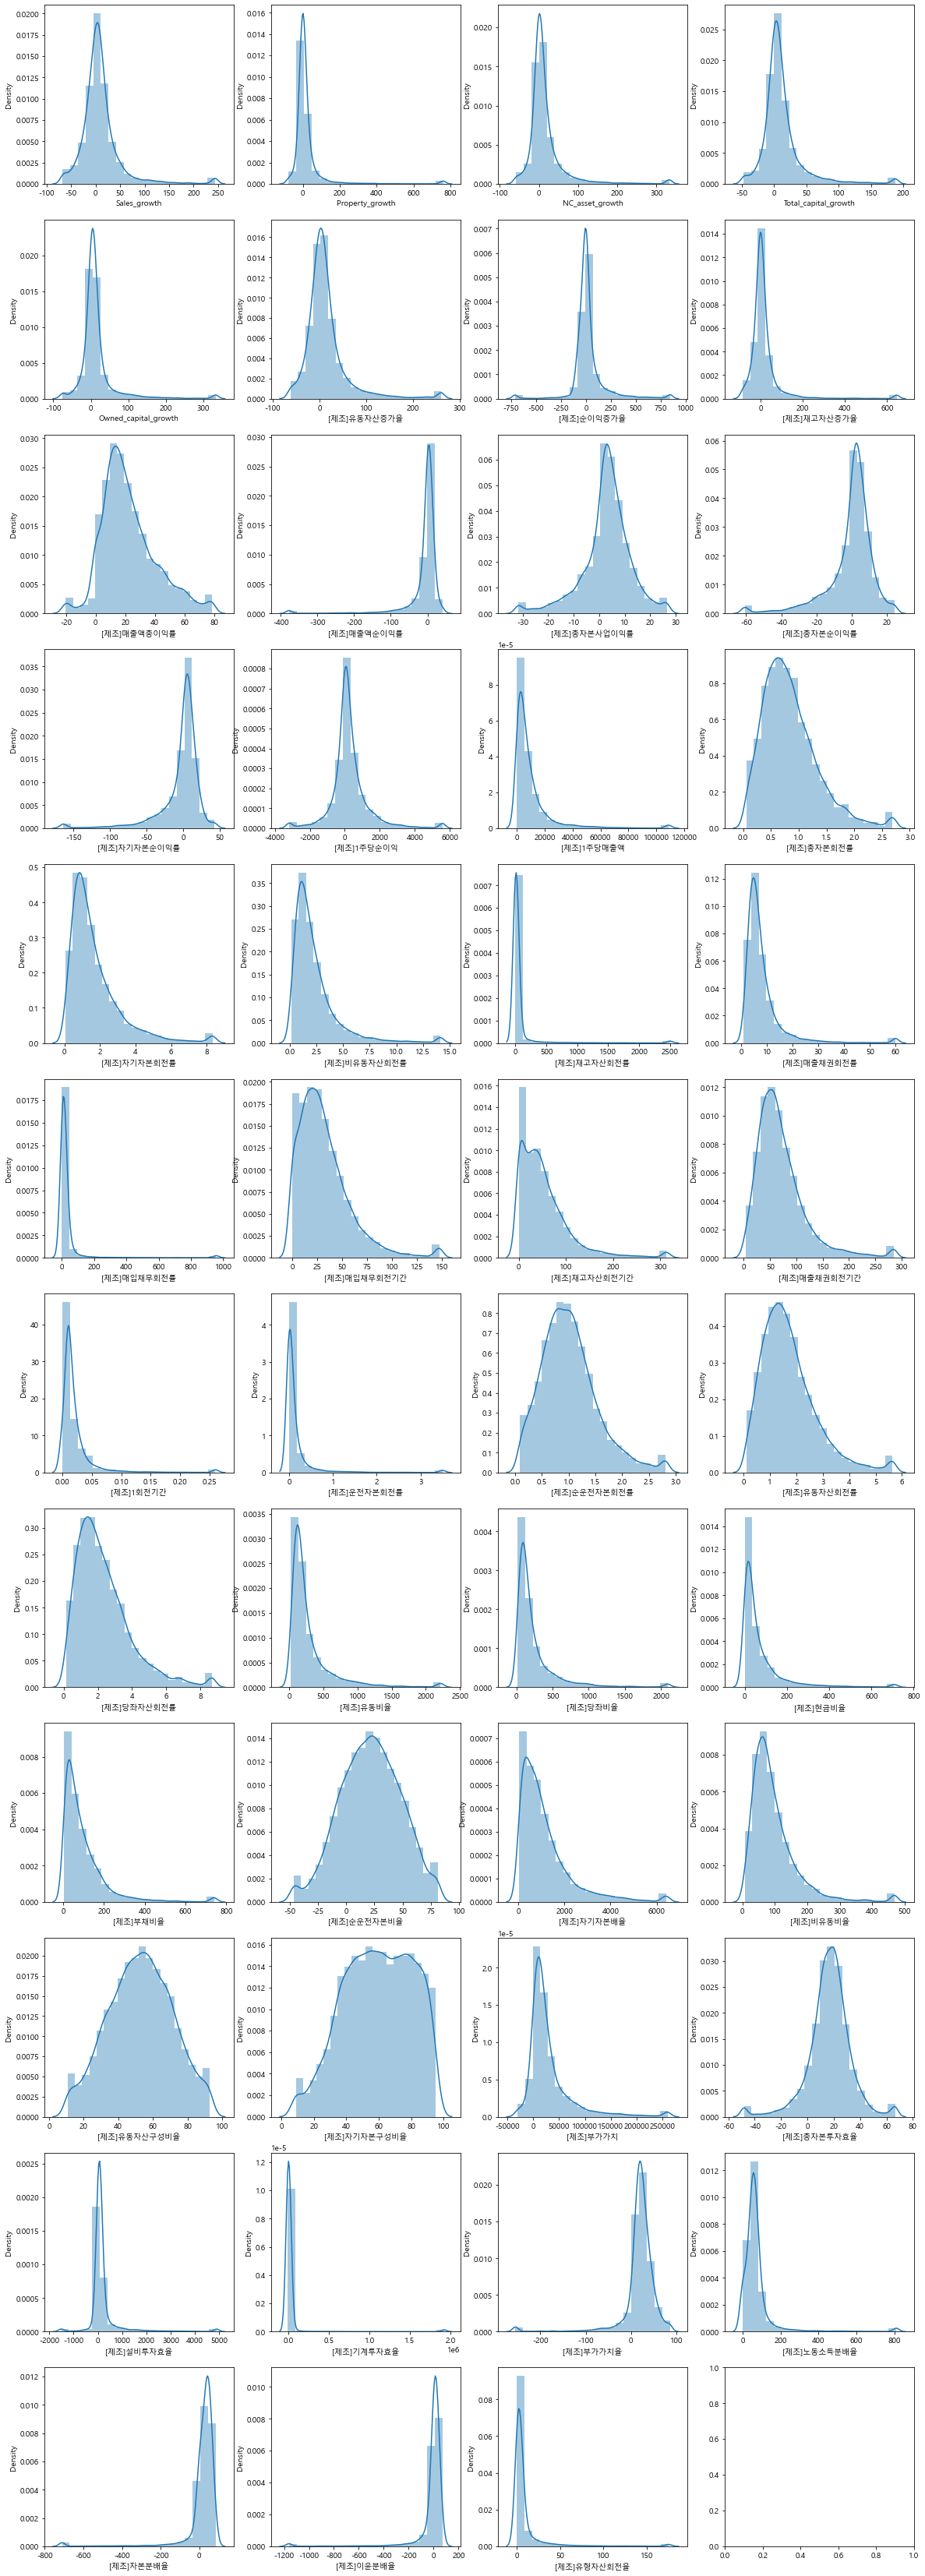

In [48]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 4
row_n = 12

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(df.columns[:-1]):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_growth', ylabel='Density'>

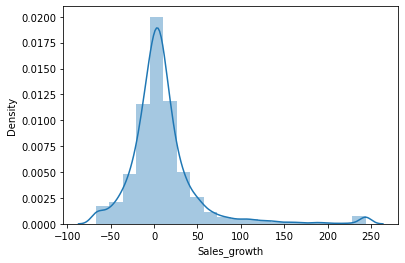

In [45]:
sns.distplot(df['Sales_growth'],bins=20)